tl;dr:  
These following features will be useful in the training of classifier

I. Please have these as necessary: (I didn't have Particle ID but please keep them)  
1. Area (Filled) (µm2) 
2. Aspect Ratio   
3. Average Blue
4. Average Green
5. Average Red  
6. Circularity (Hu)  
7. Circle Fit
8. Convexity
9. Diameter (ESD) (µm)	
10. Diameter (FD) (µm)
11. Edge Gradient
12. Feret Angle Max 
13. Feret Angle Min
14. Fiber Curl
15. Geodesic Aspect Ratio
16. Geodesic Length (µm)
17. Geodesic Thickness (µm)
18. Intensity
19. Length (µm)
20. Width (µm)
21. Particles Per Chain
22. Perimeter (µm)
23. Symmetry  
24. Transparency   

II. Optional: 
1.  Calibration Image   
2.  Ch1 Area, Ch1 Peak, Ch1 Width, Ch2 Area, Ch2 Peak, Ch2 Width, Ch2/Ch1 Ratio, Ch2/Ch1 Ratio
3.  elapsed time(conditional, please see 11)
4.  Image Height
5.  Ratio Blue/Green 
6.  Ratio Red/Blue
7.  Ratio Red/Green
8.  Roughness
9.  Scatter Area
10. Scatter Peak
11. Scatter Width  
12. Sigma Intensity  


III. Drop:  (I don't think that make much sense or some of hte infomation is provided by other datas)
1. "Area (ABD) (µm2)"
2. Capture X
3. Capture Y
4. Circularity
5. Diameter (ABD) (µm)	
6. Elongation
7. Fiber Straightness
8. Filter Score
9. Image Width
10. Image X
11. Image Y
12. Source Image
13. Sum Intensity
14. Volume (ABD)
15. Volume (ESD)

In [ ]:
# some tool box
import numpy as np
import pandas as pd 
import glob
import gc
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Machine Learning/FlowCAM Files/KORUS/Select Files"

KORUS-11-3-2am	  KORUS-18-2m  KORUS-30-2am		KORUS-51-5-2m
KORUS-11-4-2.5am  KORUS-24-2m  KORUS-31-2m		KORUS-54-2am
KORUS-13-2m	  KORUS-27-2m  KORUS-51-3-2bm
KORUS-14-2m	  KORUS-29-2m  KORUS-51-4-2m-NOCTILUCA


let's read the file from both side

In [ ]:
selected_file_path = "/content/drive/My Drive/Machine Learning/FlowCAM Files/KORUS/Select Files"
excel_path = "/content/drive/MyDrive/Machine Learning/FlowCAM Files/KORUS/KORUS-OC-2016_FlowCAM_Particle-Properties.xlsx"

In [ ]:
csv_path = glob.glob(os.path.join(selected_file_path,"**/data_export.csv"))

In [ ]:
df = pd.read_csv(csv_path[0])
for file in csv_path[1:]:
    df = pd.concat((df,pd.read_csv(file)))

In [ ]:
df_new = pd.read_excel(excel_path,sheet_name=0)

In [ ]:
print("old data shape:", df.shape,"new data shape:", df_new.shape)

old data shape: (16046, 71) new data shape: (13844, 72)


In [ ]:
df_additional_ = [i for i in df.columns if i not in df_new.columns]
df_new_additional_ = [i for i in df_new.columns if i not in df.columns]
changed_pair = [(i,j) for i in df_additional_ for j in df_new_additional_ if i in j]

In [ ]:
changed_pair

[('Area (ABD)', 'Area (ABD) (µm2)'),
 ('Area (Filled)', 'Area (Filled) (µm2)'),
 ('Convex Perimeter', 'Convex Perimeter (µm)'),
 ('Date', 'Date (From FlowCAM - Not Corrected)'),
 ('Diameter (ABD)', 'Diameter (ABD) (µm)'),
 ('Diameter (ESD)', 'Diameter (ESD) (µm)'),
 ('Diameter (FD)', 'Diameter (FD) (µm)'),
 ('Geodesic Length', 'Geodesic Length (µm)'),
 ('Geodesic Thickness', 'Geodesic Thickness (µm)'),
 ('Length', 'Geodesic Length (µm)'),
 ('Length', 'Length (µm)'),
 ('Perimeter', 'Convex Perimeter (µm)'),
 ('Perimeter', 'Perimeter (µm)'),
 ('Time', 'Time (From FlowCAM - Not Corrected)'),
 ('Time', 'Timestamp (From FlowCAM - Not Corrected)'),
 ('Timestamp', 'Timestamp (From FlowCAM - Not Corrected)'),
 ('Volume (ABD)', 'Volume (ABD) (µm3)'),
 ('Volume (ESD)', 'Volume (ESD) (µm3)'),
 ('Width', 'Width (µm)')]

In [ ]:
changed_pair.remove(('Length', 'Geodesic Length (µm)'))
changed_pair.remove(('Perimeter', 'Convex Perimeter (µm)'))
changed_pair.remove(('Time', 'Timestamp (From FlowCAM - Not Corrected)'))
changed_dict = {i[0]:i[1] for i in changed_pair}

In [ ]:
df.rename(changed_dict, axis='columns', inplace=True)

In [ ]:
df_additional_ = [i for i in df.columns if i not in df_new.columns]
df_new_additional_ = [i for i in df_new.columns if i not in df.columns]

In [ ]:
print(df_additional_, df_new_additional_)

[] ['Class']


In [ ]:
df_new.drop(df_new_additional_, axis = 'columns', inplace = True)
df = pd.concat((df, df_new))

del df_new
gc.collect()

df.head()

,Particle ID,Area (ABD) (µm2),Area (Filled) (µm2),Aspect Ratio,Average Blue,Average Green,Average Red,Calibration Factor,Calibration Image,Camera,Capture X,Capture Y,Ch1 Area,Ch1 Peak,Ch1 Width,Ch2 Area,Ch2 Peak,Ch2 Width,Ch2/Ch1 Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter (µm),Convexity,Date (From FlowCAM - Not Corrected),Diameter (ABD) (µm),Diameter (ESD) (µm),Diameter (FD) (µm),Edge Gradient,Elapsed Time,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Filter Score,Geodesic Aspect Ratio,Geodesic Length (µm),Geodesic Thickness (µm),Image File,Image Height,Image Width,Image X,Image Y,Intensity,Length (µm),Original Reference ID,Particles Per Chain,Perimeter (µm),Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green,Roughness,Scatter Area,Scatter Peak,Scatter Width,Sigma Intensity,Source Image,Sphere Complement,Sphere Count,Sphere Unknown,Sphere Volume,Sum Intensity,Symmetry,Time (From FlowCAM - Not Corrected),Timestamp (From FlowCAM - Not Corrected),Transparency,Volume (ABD) (µm3),Volume (ESD) (µm3),Width (µm)
0,1,19.7046,19.7046,0.4419,151.9286,149.5476,153.8333,1.3699,1,1,574,900,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3768,0.1710,0.2031,5.8480,58.7979,0.3500,2016-06-02,5.0089,15.9441,5.0089,36.9216,6.536,16.3107,-15.0,-90.0,0.5863,0.6304,0.0,0.0613,35.8550,2.1982,KORUS-51-4-2m-NOCTILUCA_000001.tif,23,31,0,0,151.0714,22.6033,90B226CE-7F2C-47C1-AEC1-E63A5697AB40,2,76.1066,1.0159,1.0125,1.0287,1.2944,26.0978,76.367,15.0,16.8373,32,0.0,0,0.0,0.0,6345.0,0.3207,13:47:46,2016-06-02T13:47:46.315,0.6858,65.79825,2122.272,10.2742
1,2,25.3345,25.3345,0.1565,153.3519,154.1296,151.5370,1.3699,1,1,545,885,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.6098,0.3717,0.0790,2.6904,77.8769,0.3816,2016-06-02,5.6795,21.9565,5.6795,54.5897,6.536,6.2933,35.0,-55.0,0.0000,1.3290,0.0,0.1589,25.2537,4.0128,KORUS-51-4-2m-NOCTILUCA_000001.tif,29,35,33,0,153.2593,33.5625,5F6F4EF4-D40A-4427-AEBC-C669FF8090A3,2,58.5330,0.9950,0.9882,0.9832,0.7516,26.0978,76.367,15.0,22.5702,32,0.0,0,0.0,0.0,8276.0,0.5952,13:47:46,2016-06-02T13:47:46.315,0.7413,95.92483,5542.261,4.7946
2,3,584.2990,584.2990,0.5579,162.7137,172.3056,168.8825,1.3699,1,1,439,837,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.0000,0.0414,0.1586,24.1666,267.8660,0.1890,2016-06-02,27.2755,82.3843,27.2755,26.8362,6.536,73.9080,-10.0,-80.0,1.4964,0.4006,0.0,0.0135,254.7755,3.4472,KORUS-51-4-2m-NOCTILUCA_000001.tif,65,93,70,0,170.1902,102.0575,934A5322-E349-401E-A842-E7F082EC9AFA,8,516.4453,0.9443,1.0379,0.9801,1.9280,26.0978,76.367,15.0,8.6058,32,0.0,0,0.0,0.0,79649.0,0.0662,13:47:46,2016-06-02T13:47:46.315,0.6689,10624.70000,292773.400,51.3712
3,4,56.7434,56.7434,0.4824,160.3556,167.8444,163.0444,1.3699,1,1,384,825,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3368,0.1750,0.2395,5.7134,78.3936,0.3782,2016-06-02,8.4999,22.2228,8.4999,16.7467,6.536,15.8863,-25.0,60.0,0.8445,0.5422,0.0,0.0629,51.7990,3.2606,KORUS-51-4-2m-NOCTILUCA_000001.tif,30,34,165,0,165.5778,28.0829,747015E5-B24E-4ABF-B632-EB94E013F2C5,2,110.1191,0.9554,1.0168,0.9714,1.4047,26.0978,76.367,15.0,4.7679,32,0.0,0,0.0,0.0,14902.0,0.0510,13:47:46,2016-06-02T13:47:46.315,0.6175,321.54150,5746.382,14.3839
4,5,48.1883,48.1883,0.3312,160.5000,168.9634,165.7927,1.3699,1,1,428,823,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3563,0.2321,0.3154,4.3081,70.3237,0.5636,2016-06-02,7.8330,19.4070,7.8330,25.3833,6.536,11.4468,-30.0,65.0,0.4250,0.7018,0.0,0.0874,41.9699,3.6665,KORUS-51-4-2m-NOCTILUCA_000001.tif,24,35,201,0,167.1098,29.4528,C13D2F17-0022-4982-9C24-00CD8B439C3E,2,91.2729,0.9499,1.0330,0.9812,1.2979,26.0978,76.367,15.0,6.7607,32,0.0,0,0.0,0.0,13703.0,0.4037,13:47:46,2016-06-02T13:47:46.315,0.5964,251.63830,3827.113,8.9043


In [ ]:
non_numerical = ["Particle ID",
                 "Image File",
                 "Original Reference ID", 
                 "Timestamp (From FlowCAM - Not Corrected)", 
                 "Time (From FlowCAM - Not Corrected)", 
                 "Date (From FlowCAM - Not Corrected)"]

df = df.drop(non_numerical, axis = 1)

In [ ]:
df.head()

,Area (ABD) (µm2),Area (Filled) (µm2),Aspect Ratio,Average Blue,Average Green,Average Red,Calibration Factor,Calibration Image,Camera,Capture X,Capture Y,Ch1 Area,Ch1 Peak,Ch1 Width,Ch2 Area,Ch2 Peak,Ch2 Width,Ch2/Ch1 Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter (µm),Convexity,Diameter (ABD) (µm),Diameter (ESD) (µm),Diameter (FD) (µm),Edge Gradient,Elapsed Time,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Filter Score,Geodesic Aspect Ratio,Geodesic Length (µm),Geodesic Thickness (µm),Image Height,Image Width,Image X,Image Y,Intensity,Length (µm),Particles Per Chain,Perimeter (µm),Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green,Roughness,Scatter Area,Scatter Peak,Scatter Width,Sigma Intensity,Source Image,Sphere Complement,Sphere Count,Sphere Unknown,Sphere Volume,Sum Intensity,Symmetry,Transparency,Volume (ABD) (µm3),Volume (ESD) (µm3),Width (µm)
0,19.7046,19.7046,0.4419,151.9286,149.5476,153.8333,1.3699,1,1,574,900,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3768,0.1710,0.2031,5.8480,58.7979,0.3500,5.0089,15.9441,5.0089,36.9216,6.536,16.3107,-15.0,-90.0,0.5863,0.6304,0.0,0.0613,35.8550,2.1982,23,31,0,0,151.0714,22.6033,2,76.1066,1.0159,1.0125,1.0287,1.2944,26.0978,76.367,15.0,16.8373,32,0.0,0,0.0,0.0,6345.0,0.3207,0.6858,65.79825,2122.272,10.2742
1,25.3345,25.3345,0.1565,153.3519,154.1296,151.5370,1.3699,1,1,545,885,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.6098,0.3717,0.0790,2.6904,77.8769,0.3816,5.6795,21.9565,5.6795,54.5897,6.536,6.2933,35.0,-55.0,0.0000,1.3290,0.0,0.1589,25.2537,4.0128,29,35,33,0,153.2593,33.5625,2,58.5330,0.9950,0.9882,0.9832,0.7516,26.0978,76.367,15.0,22.5702,32,0.0,0,0.0,0.0,8276.0,0.5952,0.7413,95.92483,5542.261,4.7946
2,584.2990,584.2990,0.5579,162.7137,172.3056,168.8825,1.3699,1,1,439,837,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.0000,0.0414,0.1586,24.1666,267.8660,0.1890,27.2755,82.3843,27.2755,26.8362,6.536,73.9080,-10.0,-80.0,1.4964,0.4006,0.0,0.0135,254.7755,3.4472,65,93,70,0,170.1902,102.0575,8,516.4453,0.9443,1.0379,0.9801,1.9280,26.0978,76.367,15.0,8.6058,32,0.0,0,0.0,0.0,79649.0,0.0662,0.6689,10624.70000,292773.400,51.3712
3,56.7434,56.7434,0.4824,160.3556,167.8444,163.0444,1.3699,1,1,384,825,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3368,0.1750,0.2395,5.7134,78.3936,0.3782,8.4999,22.2228,8.4999,16.7467,6.536,15.8863,-25.0,60.0,0.8445,0.5422,0.0,0.0629,51.7990,3.2606,30,34,165,0,165.5778,28.0829,2,110.1191,0.9554,1.0168,0.9714,1.4047,26.0978,76.367,15.0,4.7679,32,0.0,0,0.0,0.0,14902.0,0.0510,0.6175,321.54150,5746.382,14.3839
4,48.1883,48.1883,0.3312,160.5000,168.9634,165.7927,1.3699,1,1,428,823,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3563,0.2321,0.3154,4.3081,70.3237,0.5636,7.8330,19.4070,7.8330,25.3833,6.536,11.4468,-30.0,65.0,0.4250,0.7018,0.0,0.0874,41.9699,3.6665,24,35,201,0,167.1098,29.4528,2,91.2729,0.9499,1.0330,0.9812,1.2979,26.0978,76.367,15.0,6.7607,32,0.0,0,0.0,0.0,13703.0,0.4037,0.5964,251.63830,3827.113,8.9043


In [ ]:
# drop the columns which are always the same value
same_col = [i for i in df.columns if df[i].unique().shape[0] == 1]
df.drop(same_col, axis = "columns", inplace=True)

In [ ]:
df.head()

,Area (ABD) (µm2),Area (Filled) (µm2),Aspect Ratio,Average Blue,Average Green,Average Red,Calibration Image,Capture X,Capture Y,Ch1 Area,Ch1 Peak,Ch1 Width,Ch2 Area,Ch2 Peak,Ch2 Width,Ch2/Ch1 Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter (µm),Convexity,Diameter (ABD) (µm),Diameter (ESD) (µm),Diameter (FD) (µm),Edge Gradient,Elapsed Time,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Filter Score,Geodesic Aspect Ratio,Geodesic Length (µm),Geodesic Thickness (µm),Image Height,Image Width,Image X,Image Y,Intensity,Length (µm),Particles Per Chain,Perimeter (µm),Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green,Roughness,Scatter Area,Scatter Peak,Scatter Width,Sigma Intensity,Source Image,Sum Intensity,Symmetry,Transparency,Volume (ABD) (µm3),Volume (ESD) (µm3),Width (µm)
0,19.7046,19.7046,0.4419,151.9286,149.5476,153.8333,1,574,900,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3768,0.1710,0.2031,5.8480,58.7979,0.3500,5.0089,15.9441,5.0089,36.9216,6.536,16.3107,-15.0,-90.0,0.5863,0.6304,0.0,0.0613,35.8550,2.1982,23,31,0,0,151.0714,22.6033,2,76.1066,1.0159,1.0125,1.0287,1.2944,26.0978,76.367,15.0,16.8373,32,6345.0,0.3207,0.6858,65.79825,2122.272,10.2742
1,25.3345,25.3345,0.1565,153.3519,154.1296,151.5370,1,545,885,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.6098,0.3717,0.0790,2.6904,77.8769,0.3816,5.6795,21.9565,5.6795,54.5897,6.536,6.2933,35.0,-55.0,0.0000,1.3290,0.0,0.1589,25.2537,4.0128,29,35,33,0,153.2593,33.5625,2,58.5330,0.9950,0.9882,0.9832,0.7516,26.0978,76.367,15.0,22.5702,32,8276.0,0.5952,0.7413,95.92483,5542.261,4.7946
2,584.2990,584.2990,0.5579,162.7137,172.3056,168.8825,1,439,837,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.0000,0.0414,0.1586,24.1666,267.8660,0.1890,27.2755,82.3843,27.2755,26.8362,6.536,73.9080,-10.0,-80.0,1.4964,0.4006,0.0,0.0135,254.7755,3.4472,65,93,70,0,170.1902,102.0575,8,516.4453,0.9443,1.0379,0.9801,1.9280,26.0978,76.367,15.0,8.6058,32,79649.0,0.0662,0.6689,10624.70000,292773.400,51.3712
3,56.7434,56.7434,0.4824,160.3556,167.8444,163.0444,1,384,825,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3368,0.1750,0.2395,5.7134,78.3936,0.3782,8.4999,22.2228,8.4999,16.7467,6.536,15.8863,-25.0,60.0,0.8445,0.5422,0.0,0.0629,51.7990,3.2606,30,34,165,0,165.5778,28.0829,2,110.1191,0.9554,1.0168,0.9714,1.4047,26.0978,76.367,15.0,4.7679,32,14902.0,0.0510,0.6175,321.54150,5746.382,14.3839
4,48.1883,48.1883,0.3312,160.5000,168.9634,165.7927,1,428,823,0.0,0.7488,0.0,0.0,0.7488,0.0,0.0,0.3563,0.2321,0.3154,4.3081,70.3237,0.5636,7.8330,19.4070,7.8330,25.3833,6.536,11.4468,-30.0,65.0,0.4250,0.7018,0.0,0.0874,41.9699,3.6665,24,35,201,0,167.1098,29.4528,2,91.2729,0.9499,1.0330,0.9812,1.2979,26.0978,76.367,15.0,6.7607,32,13703.0,0.4037,0.5964,251.63830,3827.113,8.9043


In [ ]:
# this one is the dataset suggested by Dr.Gomes
df_new1 = pd.read_excel(excel_path, sheet_name=1)
for i in df_new1.columns:
    print(i)

Particle ID
Aspect Ratio
Average Blue
Average Green
Average Red
Circle Fit
Circularity (Hu)
Compactness
Convexity
Diameter (ABD) (µm)
Diameter (ESD) (µm)
Diameter (FD) (µm)
Edge Gradient
Feret Angle Max
Feret Angle Min
Geodesic Aspect Ratio
Geodesic Length (µm)
Geodesic Thickness (µm)
Length (µm)
Sum Intensity
Symmetry
Width (µm)


In [ ]:
corrMatrix=df.corr()
corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) # borrowed from Karl D's answer

already_in = set()
result = []
for col in corrMatrix:
    perfect_corr = corrMatrix[col][corrMatrix[col] >= 0.85].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)

1. Area (ABD) (µm2) vs	Area (Filled) (µm2), 

In [ ]:
df[["Area (ABD) (µm2)", "Area (Filled) (µm2)"]].corr()

,Area (ABD) (µm2),Area (Filled) (µm2)
Area (ABD) (µm2),1.000000,0.881328
Area (Filled) (µm2),0.881328,1.000000


with a strong correlation,  I think (Filled) one make a little bit more sense from doc

2. Aspect Ratio obviously important

3. "Average Blue","Average Green","Average Red", color measurement

4. Calibration Image

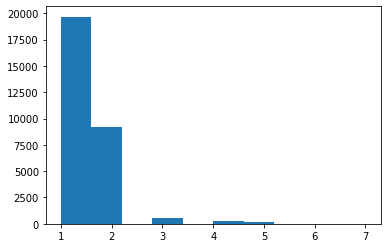

In [ ]:
plt.hist(df["Calibration Image"]);

In [ ]:
np.unique(df["Calibration Image"], return_counts=True)

(array([1, 2, 3, 4, 5, 7]), array([19675,  9211,   560,   306,   128,    10]))

Hmmmm I don't really know what's that, documentation also gives nothing, TBD

5. Capture X & Capture Y, I don't really think position is important

6. Ch1 Area,	Ch1 Peak,	Ch1 Width,	Ch2 Area,	Ch2 Peak,	Ch2 Width,	Ch2/Ch1 Ratio, Ch2/Ch1 Ratio flouresence group, deprecated for we are not using flouresence mode

7. 'Circle Fit','Circularity', 'Circularity (Hu)' 'Compactness' , Circularity group

In [ ]:
df[['Circle Fit','Circularity', 'Circularity (Hu)']].corr()

,Circle Fit,Circularity,Circularity (Hu)
Circle Fit,1.000000,0.898768,0.867390
Circularity,0.898768,1.000000,0.932885
Circularity (Hu),0.867390,0.932885,1.000000


very strong correlations, Circularity (Hu) is stated in the document working better than Circularity, let's say keep both circle fit and Circularity (Hu), my math intuition told me the subtle relation between area and perimeter may give some iteresting features, compactness is inverse the circularity so also depleted

8. 'Convexity' geometric feature from another pespective, let's keep it

9. 'Diameter (ABD) (µm)', 'Diameter (ESD) (µm)', 'Diameter (FD) (µm)' diameter group

In [ ]:
df[['Diameter (ABD) (µm)', 'Diameter (ESD) (µm)', 'Diameter (FD) (µm)']].corr()

,Diameter (ABD) (µm),Diameter (ESD) (µm),Diameter (FD) (µm)
Diameter (ABD) (µm),1.000000,0.928951,0.964722
Diameter (ESD) (µm),0.928951,1.000000,0.885236
Diameter (FD) (µm),0.964722,0.885236,1.000000


These three value are generally delivering same info,  ABD one seems not working quite well in document, and ESD looks making more geometric sense. The document doesn't provide what FD is, let's just keep it for now, as a replacement of ABD (0.96 correlation is almost identical...)

10. 'Edge Gradient', look like a good feature, let's keep it

11. elapsed time, sound like a ... water current speed. Please help me with a investigation.   
a. if that will severly affect how clear the image is, please keep it, I think that may affect something.  
b. otherwise drop it

12. Elongation: inverse of Geodesic Aspect Ratio, for we are keeping Geodesic Aspect Ratio (will be discussed later), this one will be dropped

13. 'Feret Angle Max', 'Feret Angle Min': both of these two seems doesn't make much sense individually, but the combination may give some interesting geometric information... Please keep.

14. 'Fiber Curl', 'Fiber Straightness', Curl index group, the kids of Feret and Geodesic family  
${Fiber Straightness} = \frac{1}{Fiber Curl + 1}$, let's just keep one here?

15. Filter score

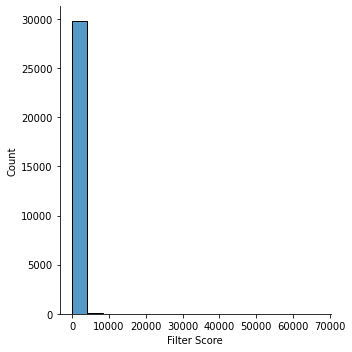

In [ ]:
sns.displot(df["Filter Score"])

There's no much information about it...Let's drop it?

16. 'Geodesic Aspect Ratio', 'Geodesic Length (µm)', 'Geodesic Thickness (µm)', Geodesic Family  
Astonishing illustration on page 9, no reason not to keep it...  
For we dropped Elongation on 12, Geodesic Aspect Ratio should be kept.  
Geodesic Length and Geodesic Thickness seems will make some chemical reaction with Feret Measurements(Diameter (ESD), Length and Width), keep

17. 'Image Height', 'Image Width', for I'm keep the actual aspect ratio of the image, we can only keep one of it. (Actually drop both is acceptable...)

18. 'Image X','Image Y', drop

19. Intensity: I'll say not that important but my intuition tell me that we can keep it...

20. 'Length (µm)', 'Width (µm)' : Feret Shape group, keep

21. Particles Per Chain

In [ ]:
count = np.unique(df['Particles Per Chain'], return_counts=True)
dict(zip(count[0],count[1]))

{1: 24952,
 2: 3751,
 3: 805,
 4: 192,
 5: 74,
 6: 36,
 7: 15,
 8: 13,
 9: 5,
 10: 5,
 11: 4,
 12: 3,
 13: 1,
 14: 4,
 15: 2,
 16: 1,
 17: 3,
 18: 5,
 19: 5,
 20: 2,
 21: 4,
 22: 1,
 23: 1,
 24: 5,
 27: 1}

Let's keep it, The number of particles will greatly affect the shape of images and will take bring some info as long as we maintains the same nearest neighbor distance setting across all the images.

22. Perimeter (µm), please keep

23. 'Ratio Blue/Green', 'Ratio Red/Blue','Ratio Red/Green' RGB ratio group

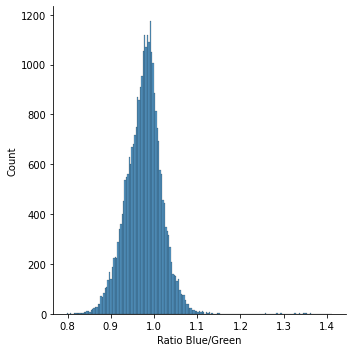

In [ ]:
sns.displot(df["Ratio Blue/Green"])

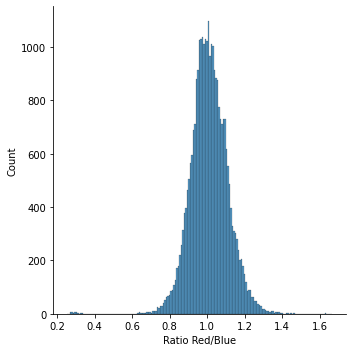

In [ ]:
sns.displot(df["Ratio Red/Blue"])

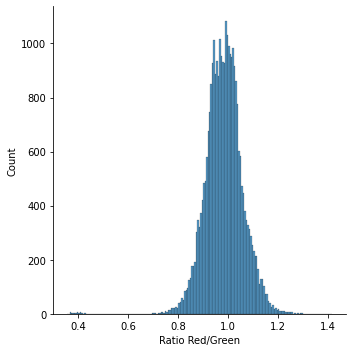

In [ ]:
sns.displot(df["Ratio Red/Green"])

In [ ]:
df[['Average Blue', 'Average Green', 'Average Red']].corr()

,Average Blue,Average Green,Average Red
Average Blue,1.000000,0.97440,0.890556
Average Green,0.974400,1.00000,0.940810
Average Red,0.890556,0.94081,1.000000


In [ ]:
df[['Ratio Blue/Green', 'Ratio Red/Blue','Ratio Red/Green']].corr()

,Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green
Ratio Blue/Green,1.000000,-0.733953,-0.425076
Ratio Red/Blue,-0.733953,1.000000,0.919241
Ratio Red/Green,-0.425076,0.919241,1.000000


In [ ]:
df[['Average Blue', 'Average Green', 'Average Red','Ratio Blue/Green', 'Ratio Red/Blue','Ratio Red/Green']].corr()

,Average Blue,Average Green,Average Red,Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green
Average Blue,1.000000,0.974400,0.890556,-0.044122,0.082378,0.094348
Average Green,0.974400,1.000000,0.940810,-0.264068,0.239786,0.179566
Average Red,0.890556,0.940810,1.000000,-0.367004,0.520646,0.496393
Ratio Blue/Green,-0.044122,-0.264068,-0.367004,1.000000,-0.733953,-0.425076
Ratio Red/Blue,0.082378,0.239786,0.520646,-0.733953,1.000000,0.919241
Ratio Red/Green,0.094348,0.179566,0.496393,-0.425076,0.919241,1.000000


let's keep them for now, I hope they will convey some color informations.(More for the clustering, probably will drop when applied to NN)

24. Roughness: Keep it? I hope it can take some information about inner hole.

25. 'Scatter Area', 'Scatter Peak','Scatter Width': Scatter detector

In [ ]:
df[['Scatter Area', 'Scatter Peak','Scatter Width']].corr()

,Scatter Area,Scatter Peak,Scatter Width
Scatter Area,1.000000,0.454632,0.991207
Scatter Peak,0.454632,1.000000,0.387685
Scatter Width,0.991207,0.387685,1.000000


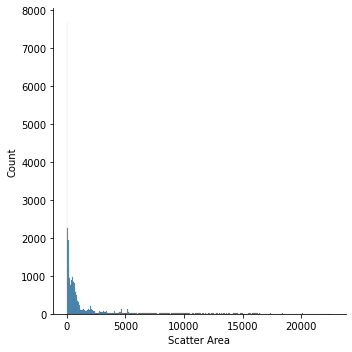

In [ ]:
sns.displot(df['Scatter Area'])

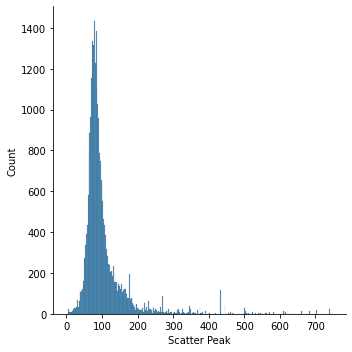

In [ ]:
sns.displot(df['Scatter Peak'])

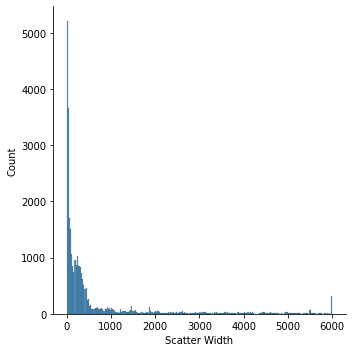

In [ ]:
sns.displot(df['Scatter Width'])

There's no much useful explanation in the documentation. Let's say TBD...

26. 'Sigma Intensity' , the std. dev of Intensity... How hemogeneous the structure is. Keep it for now.

27. Source Image, Dropped

28. 'Sum Intensity' Dropped, average Intensity is already included

29. 'Symmetry': important shape feature, keep

30. Transparency  
From the definition. Have it kept

31. Volume (ABD), Volume (ESD):   
this value is the volume of a sphere with diameter = ABD Diameter or ESD Diameter, we've already have Diameters, dropped.